In [101]:
import os

In [113]:
# Directory with our training horse pictures
train_horse_dir = os.path.join(r'C:\Users\idris\OneDrive\Bureau\Study\s6\DATA\horse-or-human\horses')

# Directory with our training human pictures
train_human_dir = os.path.join(r'C:\Users\idris\OneDrive\Bureau\Study\s6\DATA\horse-or-human\humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join(r'C:\Users\idris\OneDrive\Bureau\Study\s6\DATA\validation-horse-or-human\horses')

# Directory with our training human pictures
validation_human_dir = os.path.join(r'C:\Users\idris\OneDrive\Bureau\Study\s6\DATA\validation-horse-or-human\humans')

In [114]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [115]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
print("hello")

hello


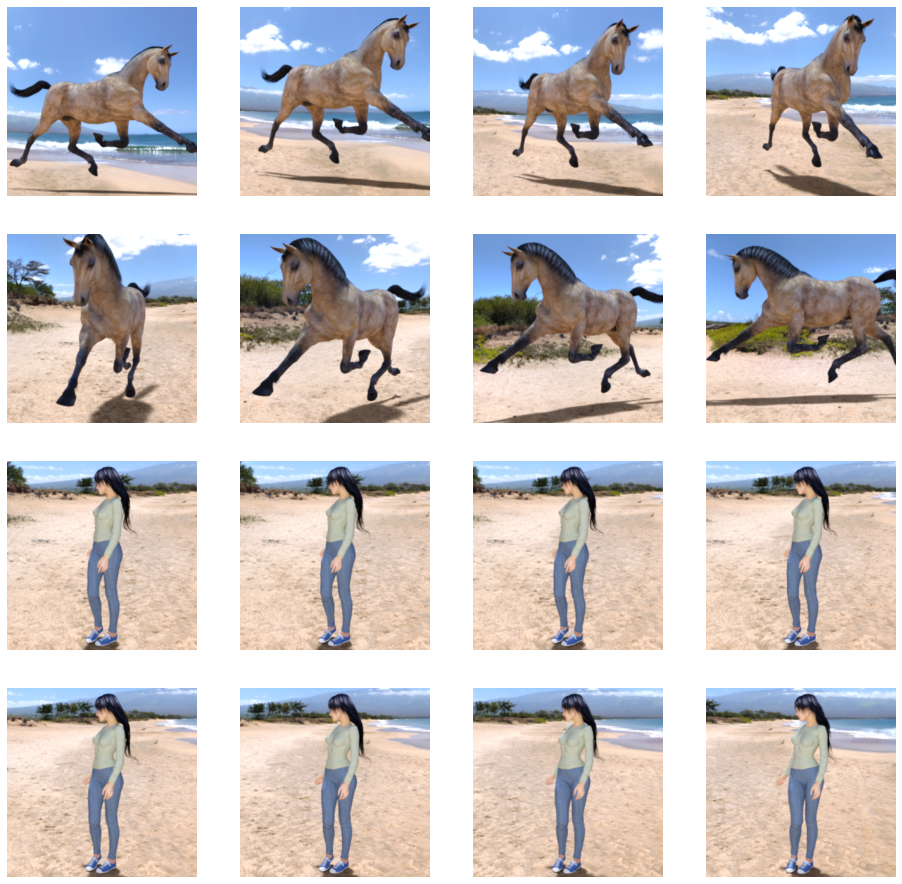

In [105]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[50:58]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [106]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [107]:
import tensorflow as tf


print(tf.__version__)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

2.8.0
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 35, 35, 64

In [108]:

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [109]:
from keras.preprocessing import image

# All images will be rescaled by 1./255
train_datagen = image.ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\idris\OneDrive\Bureau\Study\s6\DATA\horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = image.ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\idris\OneDrive\Bureau\Study\s6\DATA\validation-horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [110]:
history = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs=3,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=1)

Epoch 1/3
8/8 [==============================] - 40s 5s/step - loss: 1.5709 - accuracy: 0.5339 - val_loss: 0.5623 - val_accuracy: 0.8086
Epoch 2/3
8/8 [==============================] - 35s 4s/step - loss: 0.6286 - accuracy: 0.5851 - val_loss: 0.9543 - val_accuracy: 0.5195
Epoch 3/3
8/8 [==============================] - 36s 4s/step - loss: 0.4386 - accuracy: 0.7753 - val_loss: 0.7397 - val_accuracy: 0.6641


[[-0.0001099 -0.0001099 -0.0001099 ... -0.0001099 -0.0001099 -0.0001099]
 [-0.0001099 -0.0001099 -0.0001099 ... -0.0001099 -0.0001099 -0.0001099]
 [-0.0001099 -0.0001099 -0.0001099 ... -0.0001099 -0.0001099 -0.0001099]
 ...
 [-0.0001099 -0.0001099 -0.0001099 ... -0.0001099 -0.0001099 -0.0001099]
 [-0.0001099 -0.0001099 -0.0001099 ... -0.0001099 -0.0001099 -0.0001099]
 [-0.0001099 -0.0001099 -0.0001099 ... -0.0001099 -0.0001099 -0.0001099]]
[[ 0.19506627  0.18355009  0.1664766  ...  0.18391347  0.18467286
   0.18970811]
 [ 0.19230938  0.18125236  0.17034149 ...  0.18022287  0.19089487
   0.19816074]
 [ 0.1927597   0.18959421  0.17087561 ...  0.18491226  0.19879565
   0.20128652]
 ...
 [-0.0975875  -0.09493703 -0.10085636 ... -0.10525364 -0.14179032
  -0.16993552]
 [-0.06122831 -0.06314543 -0.06769112 ... -0.10679804 -0.14023979
  -0.14578816]
 [-0.02780241 -0.03010526 -0.02505013 ... -0.12139957 -0.11867929
  -0.10039052]]
[[-0.01611709 -0.01611709 -0.01611709 ... -0.01611709 -0.0161170

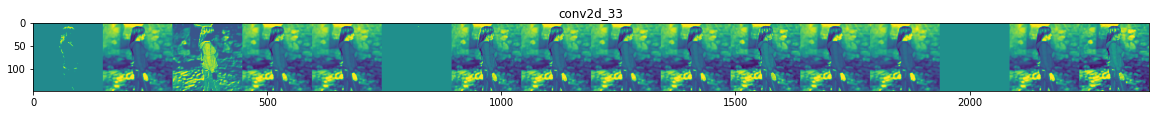

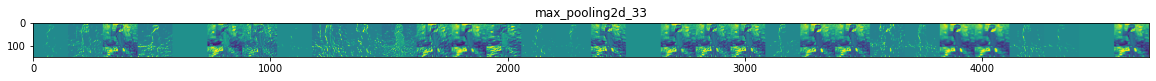

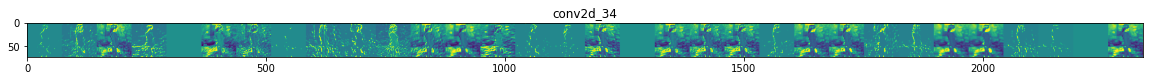

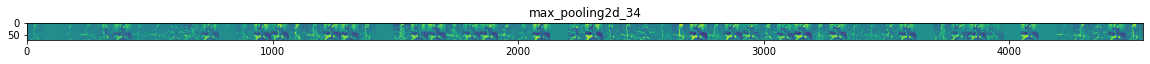

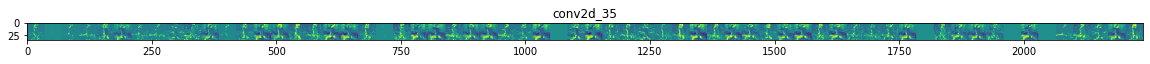

In [111]:
import numpy as np
import random


# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = image.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = image.img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      print(x)
      if x.any()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')